In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
#import zipfile

#with zipfile.ZipFile(r"C:\Users\keert\Downloads\mask_detection.zip","r") as zip_ref:
#    zip_ref.extractall(r"C:\Users\keert\Downloads\mask_detection")

In [10]:
train_path = "C:/Users/keert/Downloads/mask_detection/Face Mask Dataset/Train/"
val_path = "C:/Users/keert/Downloads/mask_detection/Face Mask Dataset/Validation/"

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2)
val_datagen = ImageDataGenerator(rescale = 1./255,
                                 shear_range = 0.2,
                                 zoom_range = 0.2)

In [12]:
train_dataset = train_datagen.flow_from_directory(train_path, target_size=(64, 64), batch_size=32, class_mode="binary")
val_dataset = val_datagen.flow_from_directory(val_path, target_size=(64, 64), batch_size=32, class_mode="binary")

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [15]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), input_shape=(64, 64, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(2, activation="sigmoid")
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 128)         7

In [28]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

NameError: name 'model' is not defined

In [26]:
#model.fit_generator(train_dataset, validation_data=val_dataset, epochs=20)

Epoch 1/20
313/313 [==============================] - 317s 1s/step - loss: 0.1715 - accuracy: 0.9189 - val_loss: 0.0267 - val_accuracy: 0.9900
Epoch 2/20
313/313 [==============================] - 145s 464ms/step - loss: 0.0491 - accuracy: 0.9827 - val_loss: 0.0199 - val_accuracy: 0.9962
Epoch 3/20
313/313 [==============================] - 199s 635ms/step - loss: 0.0373 - accuracy: 0.9866 - val_loss: 0.0220 - val_accuracy: 0.9912
Epoch 4/20
313/313 [==============================] - 216s 690ms/step - loss: 0.0326 - accuracy: 0.9880 - val_loss: 0.0199 - val_accuracy: 0.9925
Epoch 5/20
313/313 [==============================] - 172s 551ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0194 - val_accuracy: 0.9937
Epoch 6/20
313/313 [==============================] - 190s 606ms/step - loss: 0.0252 - accuracy: 0.9912 - val_loss: 0.0131 - val_accuracy: 0.9950
Epoch 7/20
313/313 [==============================] - 241s 771ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0149 - va

In [27]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [4]:
from tensorflow.keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [5]:
test_path = "C:/Users/keert/Downloads/mask_detection/Face Mask Dataset/Test/"

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
test_dataset = test_datagen.flow_from_directory(test_path, batch_size=32, target_size=(64,64), class_mode="binary")

Found 992 images belonging to 2 classes.


In [62]:
pred_result = loaded_model.predict(test_dataset)

In [66]:
pred_c =[]
for i in range (len(pred_result)):
    pred_class = pred_result[i].argmax()
    pred_c.append(pred_class)

In [67]:
pred_c

[0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,


In [17]:
pred_result[0]
if pred_result[0][0] > 0.5:
    prediction = "with mask"
else:
    prediction = "without mask"
print(prediction)

without mask


In [49]:
def prediction(image):
    pred_img = loaded_model.predict(image)
    if pred_img > 0.5:
        prediction = "with mask"
    else:
        prediction = "without mask"
    return prediction

In [51]:
loaded_model.predict(img)

ValueError: in user code:

    C:\Users\keert\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\keert\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\keert\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\keert\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\keert\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\keert\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\keert\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\keert\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\keert\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [32, 64, 3]


In [53]:
img = cv2.imread("mask_detect_1.png")
img = cv2.resize(img, (64,64))

In [46]:
img.shape

(64, 64, 3)

In [42]:
pred_result[0].argmax()

1

In [32]:
loaded_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["acc"])

In [33]:
score = loaded_model.evaluate_generator(test_dataset)
print(score)

[0.03701116144657135, 0.9919354915618896]


In [39]:
from sklearn.metrics import confusion_matrix, classification_report

pred_y=loaded_model.predict(test_dataset)
y_pred = np.argmax(pred_y,axis=1)

y_actual = test_dataset.classes
cm = confusion_matrix(y_actual, y_pred)
print(cm)

[[233 250]
 [256 253]]


In [40]:
labels = ['withMask', 'withoutMask']
print(classification_report(y_actual, y_pred, target_names=labels))

              precision    recall  f1-score   support

    withMask       0.48      0.48      0.48       483
 withoutMask       0.50      0.50      0.50       509

    accuracy                           0.49       992
   macro avg       0.49      0.49      0.49       992
weighted avg       0.49      0.49      0.49       992



In [76]:
mask_label = {0:'MASK',1:'NO MASK'}
label_color = {0:(0,255,0),1:(255,0,0)}

In [70]:
face_classifier = cv2.CascadeClassifier(r'C:\Users\keert\anaconda3\pkgs\libopencv-4.0.1-hbb9e17c_0\Library\etc\haarcascades\haarcascade_frontalface_default.xml')
img = cv2.imread("maksssksksss244.png")
img_gray = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
faces = face_classifier.detectMultiScale(img_gray)

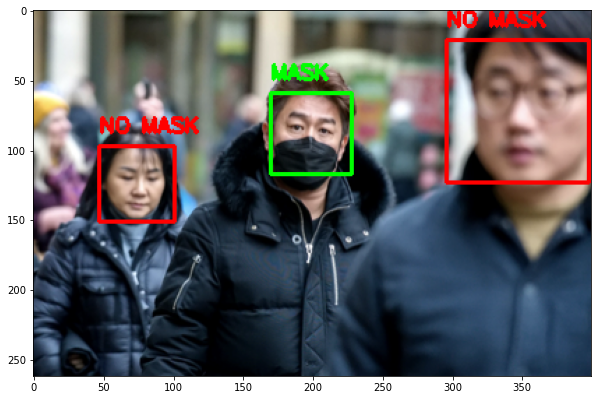

In [78]:
new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) 
for i in range(len(faces)):
    (x,y,w,h) = faces[i]
    crop = new_img[y:y+h,x:x+w]
    crop = cv2.resize(crop,(64,64))
    crop = np.reshape(crop,[1,64,64,3])/255.0
    mask_result = loaded_model.predict(crop)
    cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,label_color[mask_result.argmax()],2)
    cv2.rectangle(new_img,(x,y),(x+w,y+h),label_color[mask_result.argmax()],2)
plt.figure(figsize=(10,10))
plt.imshow(new_img)